<a href="https://colab.research.google.com/github/sampriti/Computer_Vision_DL/blob/main/Image_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image embeddings using ResNet50
### Usecases: Image similarity search, clustering, face recognition, zero shot learning, anomaly detection

## Creating the embedder
Loading the pretrained Resnet50 model weights
Removed the final classification layer to create embeddings
Image is transformed to required format for Resnet50 and then created the embeddding function

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.models
from PIL import Image

# Load the pretrained ResNet50 model
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final classification layer to get embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

# Set model to evaluation mode
model.eval()

# Define the image transformation
transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Function to extract embeddings from an image
def extract_embedding(image):
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(image)
    return embedding.squeeze()


### Printing the model
Printed the model to show that the last fully connected layer used for classification is removed. Here model is the embedder

In [ ]:
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


## Creating embeddings of images
Importing the image processing libraries

In [ ]:
from PIL import Image
import requests
from io import BytesIO

Green apple embeddings

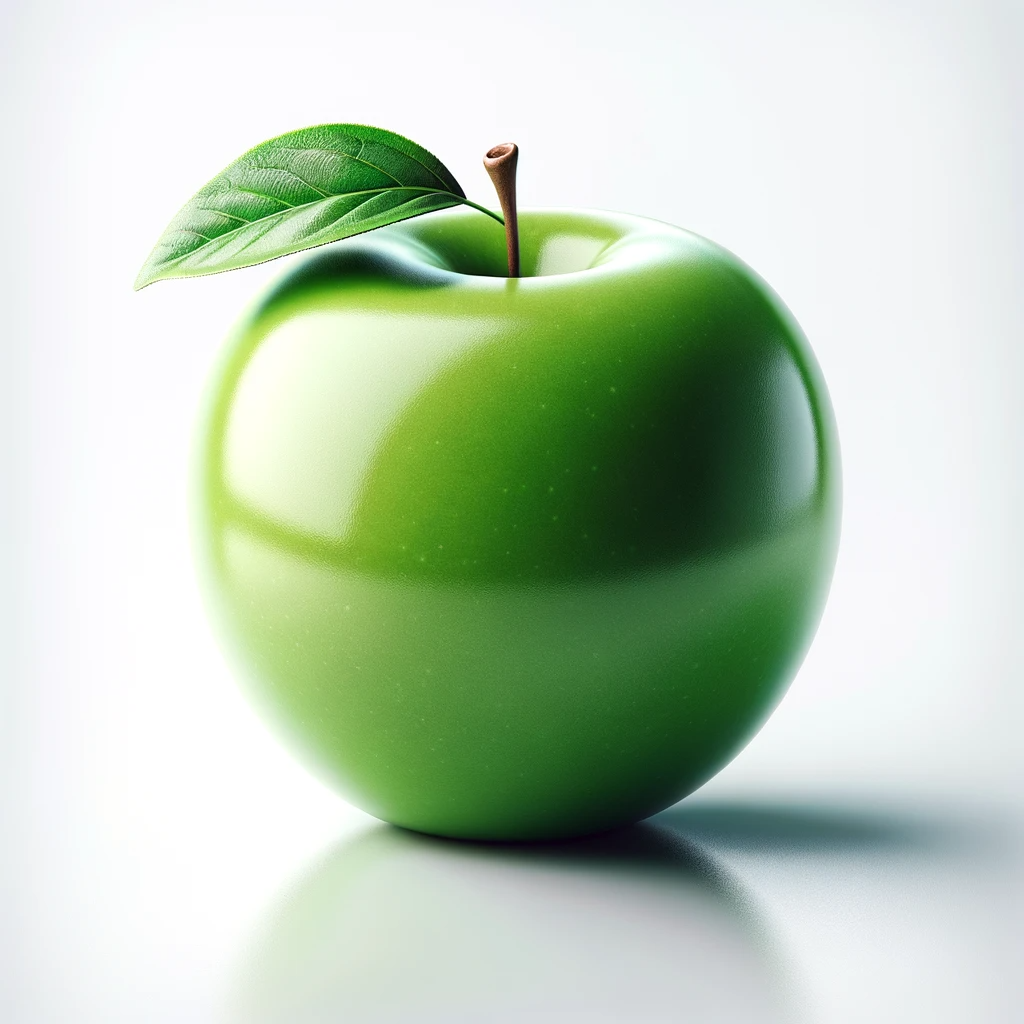

In [ ]:
green_apple_url = "https://github.com/andandandand/practical-computer-vision/blob/main/images/green_apple_1.png?raw=true"
green_apple_img=Image.open(BytesIO(requests.get(green_apple_url).content)).convert("RGB")
green_apple_img

In [ ]:
green_apple_embedding = extract_embedding(green_apple_img)
green_apple_embedding
# green_apple_embedding.shape

tensor([0.0000, 0.1119, 0.0041,  ..., 0.0000, 0.0000, 0.0000])

Red apple 1 embeddings

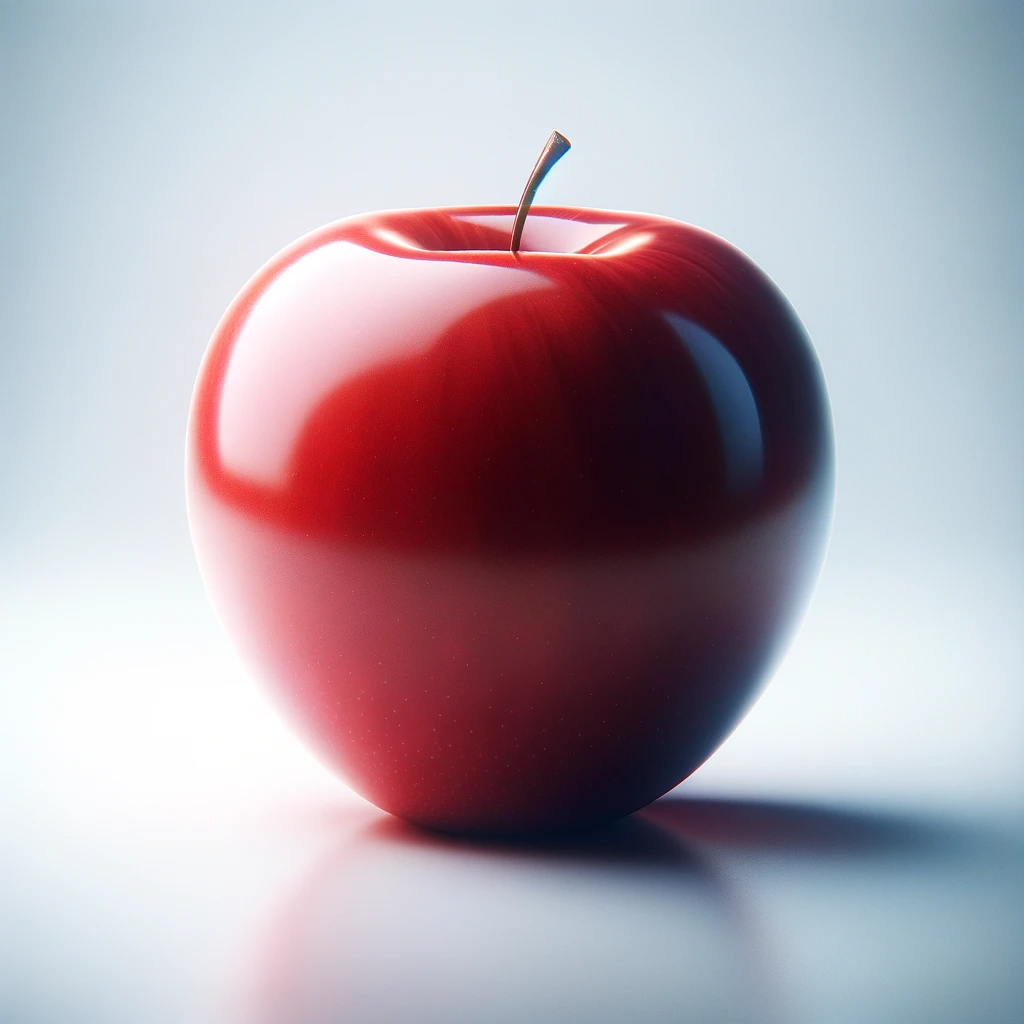

In [ ]:
red_apple_1_url = "https://github.com/andandandand/practical-computer-vision/blob/main/images/red_apple_1.png?raw=True"
red_apple_img_1=Image.open(BytesIO(requests.get(red_apple_1_url).content)).convert("RGB")
red_apple_img_1

In [ ]:
red_apple_1_embedding = extract_embedding(red_apple_img_1)
red_apple_1_embedding.shape

torch.Size([2048])

Red_apple_2_embedding and car embedding

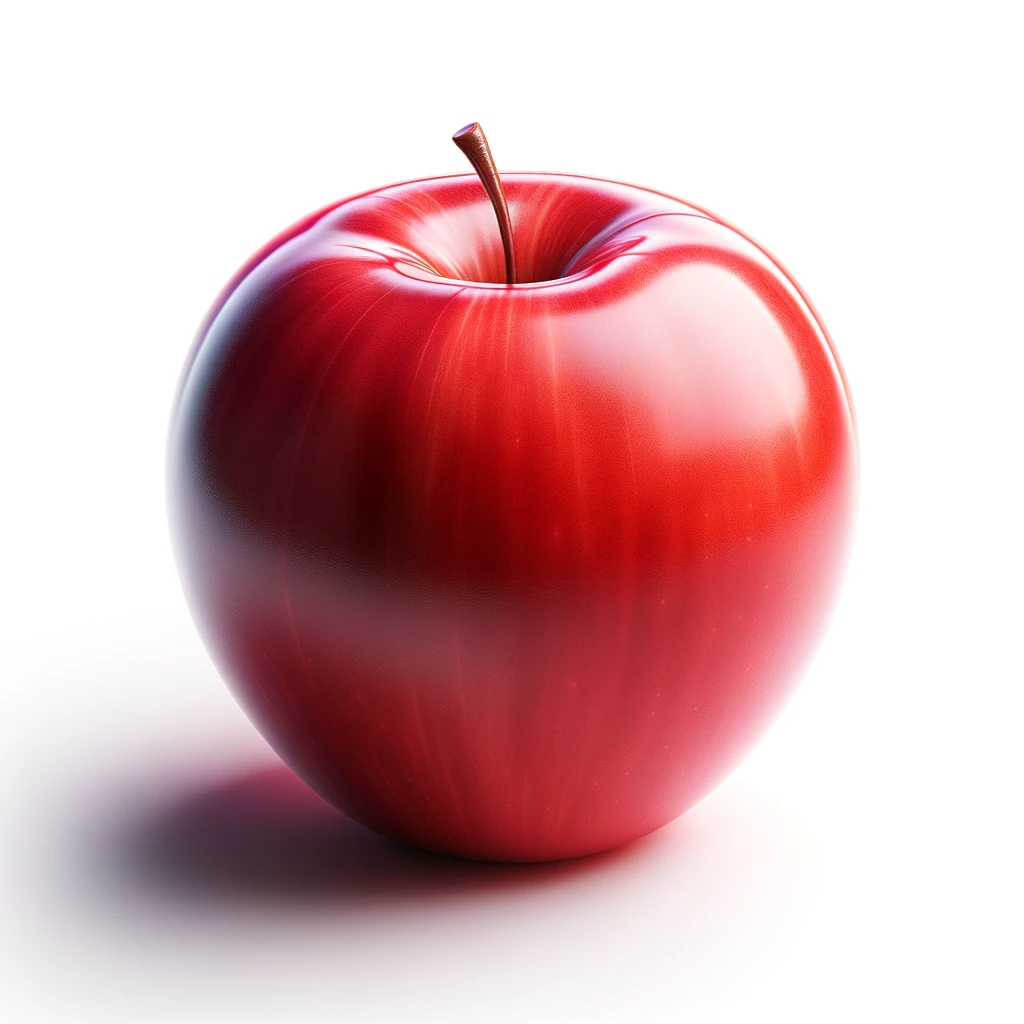

In [ ]:
url_red_apple_2 = "https://github.com/andandandand/practical-computer-vision/blob/main/images/red_apple_2.png?raw=True"
red_apple_2_img=Image.open(BytesIO(requests.get(url_red_apple_2).content)).convert("RGB")
red_apple_2_img


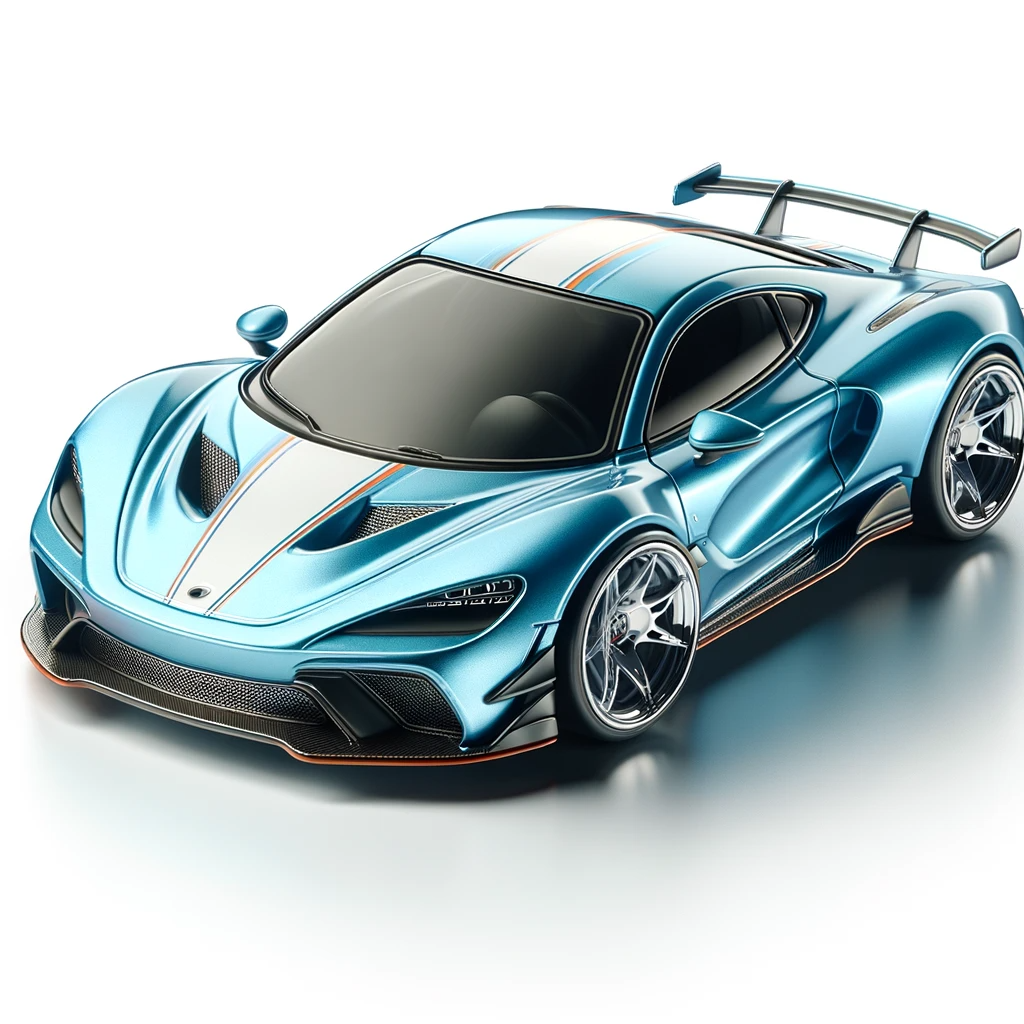

In [ ]:
image_url_car_1 = "https://github.com/andandandand/practical-computer-vision/blob/main/images/toy_car_1.png?raw=true"
image_car_1=Image.open(BytesIO(requests.get(image_url_car_1).content)).convert("RGB")
image_car_1

In [ ]:

red_apple_2_embedding = extract_embedding(red_apple_2_img)
car_1_embedding = extract_embedding(image_car_1)
car_1_embedding.shape

torch.Size([2048])

## Calculate cosine similarity to check how similar are the images
### Similar images = higher cosine similarity
### Different images = lower cosine similarity
### Similar images = Lower Euclidean distance
### Different Images = Higher Euclidean Distance
Red apple and car are very different. So, cosine similarity is very small

In [ ]:
cosine_similarity = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
cosine_similarity(red_apple_2_embedding, car_1_embedding)

tensor(0.0435)

The 2 red apples are similar but the angle of photo is different. So, cosine similarity moderate.

In [ ]:
cosine_similarity(red_apple_2_embedding, red_apple_1_embedding)

tensor(0.5230)

The green apple and red apple are different in color and angle. So, cosine similarity is less

In [ ]:
cosine_similarity(green_apple_embedding, red_apple_2_embedding)

tensor(0.2492)

The green apple and red apple are different in color but similar in angle and structure. So, cosine similarity is moderate

In [ ]:
cosine_similarity(green_apple_embedding, red_apple_1_embedding)

tensor(0.6598)


The green apple and car are very different. So, cosine similarity is very less

In [ ]:
cosine_similarity(green_apple_embedding, car_1_embedding)

tensor(0.0757)